`DESCRIÇÃO DOS ATRIBUTOS:`
            
1. Day_of_Week {'Thursday', 'Monday', 'Sunday', 'Tuesday', 'Friday', 'Wednesday','Saturday'}  

2. Junction_Detail {'T or staggered junction', 'Crossroads','Not at junction or within 20 metres', 'Roundabout','Mini-roundabout', 'More than 4 arms (not roundabout)','Private drive or entrance', 'Slip road', 'Other junction'}           

3. Accident_Injuries {'Serious', 'Slight', 'Fatal'}    

4. Light_Conditions {'Day', 'Darkness - lights lit', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting'}       

5. Number_of_Casualties {1, 11,  3,  2,  4,  5,  6, 10,  8,  7,  9, 13, 12, 14, 16, 18, 15, 19, 21, 17, 27, 48, 40, 24, 26, 22, 42, 43}      

6. Number_of_Vehicles {2,  1,  3,  4,  5,  9,  6,  8,  7, 10, 16, 13, 14, 11, 12, 32, 19}   

7. Road_Surface_Conditions {'Dry', 'Wet or damp', 'Frost or ice', 'Snow','Flood over 3cm. deep'}

8. Road_Type {'One way street', 'Single carriageway', 'Dual carriageway','Roundabout', 'Slip road'}         

9. Speed_limit {30, 20, 50, 40, 70, 60, 10, 15}     

10. Hour_of_Accident {3-6, 6-9, 9-12, 12-15, 15-18, 18-21, 21-24}

11. Urban_or_Rural_Area {'Urban', 'Rural'}   

12. Weather_Conditions {'Fine no high winds', 'Other', 'Raining no high winds','Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist'}   

13. Vehicle_Type {'Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle','Ridden horse'}

In [ ]:
!pip install pydotplus
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [45]:
import pandas as pd
import numpy as np

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction import DictVectorizer # converte dicionários Python em matrizes NumPy ou em matrizes esparsas
from sklearn.preprocessing import LabelEncoder        # converte rótulos de classes categóricas em números

In [46]:
data = pd.read_csv('car_accidentOFICIAL.csv')

### Carga dos dados e particionamento das bases de treinamento e teste

`train_test_split(X, y) -- PARTICIONA A BASE DE DADOS EM BASES DE TREINAMENTO E TESTE.`

Por padrão, 75% da base é utilizada para treinamento e 25% para testes.

No código a seguir, usaremos 15% para teste e 85% para treinamento:



In [47]:
# Convertendo os valores da coluna 'Hour_of_Accident' para string
data['Hour_of_Accident'] = data['Hour_of_Accident'].astype(str)

# Criando intervalos para os dados de hora do acidente
bins = ['0', '6', '9', '12', '15', '18', '21', '24']
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21']
data['Hour_of_Accident_Categories'] = pd.cut(data['Hour_of_Accident'], bins=bins, labels=labels, right=False)

# Dividindo os dados em features (X) e target (y)
X = data[['Hour_of_Accident_Categories']]
y = data['Accident_Injuries']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [48]:
# Contando as ocorrências de cada classe no conjunto de treinamento
class_counts = y_train.value_counts()

# Calculando os pesos de classe
class_weights = {label: 1 / count for label, count in class_counts.items()}

# Criando e treinando o modelo de árvore de decisão com os dados codificados
tree_accident = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=class_weights)

# Treinando o modelo
tree_accident.fit(X_train_encoded, y_train)

# Avaliando a acurácia do modelo no conjunto de treinamento
print("Acurácia (base de treinamento):", tree_accident.score(X_train_encoded, y_train))

# Fazendo previsões no conjunto de teste
y_pred = tree_accident.predict(X_test_encoded)

# Avaliando a acurácia de previsão
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=['Fatal', 'Serious', 'Slight'], columns=['Fatal (prev)', 'Serious (prev)', 'Slight (prev)'])
print(cnf_table)


Acurácia (base de treinamento): 0.5866654442241501
Acurácia de previsão: 0.588492510174041


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fatal       0.02      0.44      0.03       592
     Serious       0.00      0.00      0.00      6145
      Slight       0.86      0.68      0.76     39459

    accuracy                           0.59     46196
   macro avg       0.29      0.37      0.27     46196
weighted avg       0.74      0.59      0.65     46196

         Fatal (prev)  Serious (prev)  Slight (prev)
Fatal             260               0            332
Serious          2242               0           3903
Slight          12533               0          26926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Exibição da árvore de decisão

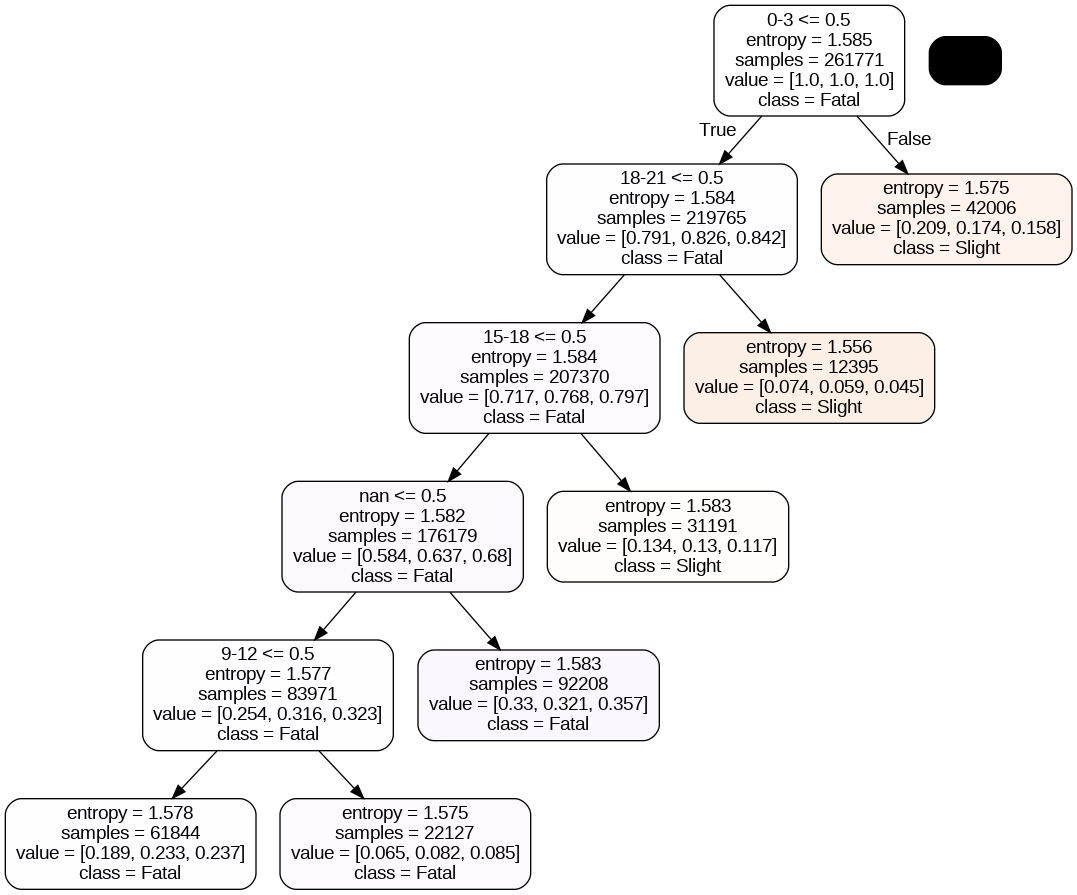

In [55]:
# Obtendo os nomes das classes originais (intervalos de hora)
feature_names = encoder.categories_[0]

# Criano DOT data
dot_data = export_graphviz(tree_accident, out_file=None,
                                rounded=True,
                                filled=True,
                                feature_names=feature_names,
                                class_names=classes)

# Desenhando Gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar Gráfico
Image(graph.create_png())
